In [1]:
'''
Random Forest and Support Vector Regression Models (rbf and linear kernels)
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
city_data = pd.read_csv('clean_city_data.csv', index_col=0)
model_data = city_data.drop(['neighbourhood','property type','room type','bed type','id','city','state','zipcode','longitude','latitude','amenities','review score', 'num reviews', 'Zhvi', 'Normalized Zhvi'], axis=1)
model_data['review conf'] = model_data['review conf']/100
model_data.head(5)

,is superhost,accommodates,bathrooms,bedrooms,beds,price,logprice,Entire home/apt,Private room,Shared room,...,Carbon Monoxide Detector,Hair Dryer,Laptop Friendly Workspace,Iron,Fire Extinguisher,Hot Water,Free Parking on Premises,Self Check-in,First Aid Kit,review conf
0,1,2,1.0,1.0,1.0,85.0,4.442651,1,0,0,...,0,0,1,1,0,0,1,1,0,0.971296
1,1,4,2.0,2.0,2.0,225.0,5.416100,1,0,0,...,0,0,1,1,0,1,1,1,0,0.868458
2,1,2,1.0,1.0,1.0,100.0,4.605170,0,1,0,...,0,0,1,1,0,1,1,0,0,0.787347
3,1,3,1.0,1.0,2.0,95.0,4.553877,1,0,0,...,0,0,0,1,0,1,0,0,0,0.956286
4,1,2,1.0,1.0,1.0,40.0,3.688879,0,1,0,...,0,0,0,0,1,1,1,0,1,0.972438


In [3]:
X = model_data.drop(['logprice','price'],axis=1)
y = model_data['logprice']

In [4]:
seed = 7
np.random.seed(seed)
kfold = KFold(n_splits=10, random_state=seed)

In [26]:
RFR_model = RandomForestRegressor(n_estimators=100, max_depth=5, max_features="auto")
RFR_model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
#SVR_opt = SVR(gamma='scale')
#SVR_opt_reg = GridSearchCV(SVR_opt, parameters, scoring = 'neg_mean_squared_error', cv=kfold)
#SVR_opt_reg.fit(X,y)
#print(SVR_opt_reg.best_params)

In [5]:
SVR_linear_model = SVR(cache_size=2000, kernel="linear")
SVR_linear_model.fit(X,y)

SVR(C=1.0, cache_size=2000, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
SVR_linear_model2 = SVR(cache_size=2000, kernel="linear", C=10)
SVR_linear_model2.fit(X,y)

In [6]:
RFR_R2 = cross_val_score(RFR_model, X, y, cv=kfold)
print("Random Forest Regression R^2 value: %.2f (std: %.2f)" % (RFR_R2.mean(), RFR_R2.std()))

Random Forest Regression R^2 value: 0.50 (std: 0.05)


In [10]:
#SVR_R2 = cross_val_score(SVR_model, X, y, cv=kfold)
#print("Support Vector Regression (rbf) R^2 value: %.2f (std: %.2f)" % (SVR_R2.mean(), SVR_R2.std()))

In [7]:
SVR_linear_R2 = cross_val_score(SVR_linear_model, X, y, cv=kfold)
print("Support Vector Regression (linear) R^2 value: %.2f (std: %.2f)" % (SVR_linear_R2.mean(), SVR_linear_R2.std()))

Support Vector Regression (linear) R^2 value: 0.51 (std: 0.03)


In [6]:
RFR_pred = cross_val_predict(RFR_model, X, y, cv=kfold)
print("Random Forest Mean squared error: %.2f"% mean_squared_error(y, RFR_pred))
print('Random Forest Test Variance score: %.2f' % r2_score(y, RFR_pred))

Random Forest Mean squared error: 0.34
Random Forest Test Variance score: 0.52


In [9]:
#SVR_pred = cross_val_predict(SVR_model, X, y, cv=kfold)
#print("SVR (rbf) Mean squared error: %.2f"% mean_squared_error(y, SVR_pred))
#print('SVR (rbf) Test Variance score: %.2f' % r2_score(y, SVR_pred))

SVR (rbf) Mean squared error: 0.30
SVR (rbf) Test Variance score: 0.57


In [6]:
SVR_linear_pred = cross_val_predict(SVR_linear_model, X, y, cv=kfold)

In [7]:
print("SVR (linear) Mean squared error: %.2f"% mean_squared_error(y, SVR_linear_pred))

SVR (linear) Mean squared error: 0.33


In [8]:
print('SVR (linear) Test Variance score: %.2f' % r2_score(y, SVR_linear_pred))

SVR (linear) Test Variance score: 0.53


In [12]:
our_features = ['is superhost', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'Entire home/apt', 'Private room', 'Shared room', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Apartment', 'Condo', 'Guest', 'Hotel', 'House', 'Other', 'Normalized Zhvi','Wifi', 'Heat', 'Essentials', 'Smoke Detector', 'Kitchen', 'Air Conditioning', 'Hangers', 'Shampoo', 'TV', 'Washer', 'Dryer', 'Carbon Monoxide Detector', 'Hair Dryer', 'Laptop Friendly Workspace', 'Iron', 'Fire Extinguisher', 'Hot Water', 'Free Parking on Premises', 'Self Check-in', 'First Aid Kit', 'review conf']

In [39]:
RFR_importances = RFR_model.feature_importances_
RFR_indices = np.argsort(RFR_importances)[::-1]
RFR_indices_name = [our_features[RFR_indices[k]] for k in range(41)]

In [36]:
SVR_linear_importances = SVR_linear_model.coef_
SVR_linear_importances = SVR_linear_importances[0]
sorted_linear_importances = sorted(list(zip(SVR_linear_importances, our_features)))[::-1]
list_of_features = [name for (coef, name) in sorted_linear_importances]
list_of_coefs = [coef for (coef, name) in sorted_linear_importances]
#SVR_linear_indices = np.argsort(SVR_linear_importances)[::-1]
#SVR_linear_indices_name = [our_features[SVR_linear_indices[k]] for k in range(41)]

In [ ]:
SVR_linear_importances2 = SVR_linear_model2.coef_
SVR_linear_importances2 = SVR_linear_importances2[0]
sorted_linear_importances2 = sorted(list(zip(SVR_linear_importances2, our_features)))[::-1]
list_of_features2 = [name for (coef, name) in sorted_linear_importances2]
list_of_coefs2 = [coef for (coef, name) in sorted_linear_importances2]

In [31]:
print("Random Forest Feature Ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, RFR_indices_name[f], RFR_importances[RFR_indices[f]]))

Random Forest Feature ranking:
1. Entire home/apt (0.556936)
2. bathrooms (0.260158)
3. Normalized Zhvi (0.066002)
4. accommodates (0.031052)
5. review conf (0.025466)
6. Hotel (0.017102)
7. Private room (0.015943)
8. bedrooms (0.011264)
9. Shared room (0.004638)
10. Hot Water (0.002846)
11. beds (0.001873)
12. Hangers (0.001596)
13. Self Check-in (0.001460)
14. Fire Extinguisher (0.001196)
15. Essentials (0.000762)
16. is superhost (0.000446)
17. TV (0.000193)
18. Dryer (0.000147)
19. Other (0.000145)
20. Shampoo (0.000118)
21. House (0.000105)
22. Free Parking on Premises (0.000079)
23. Guest (0.000075)
24. Smoke Detector (0.000067)
25. Laptop Friendly Workspace (0.000067)
26. Condo (0.000056)
27. Wifi (0.000045)
28. Airbed (0.000044)
29. Heat (0.000036)
30. First Aid Kit (0.000027)
31. Air Conditioning (0.000027)
32. Iron (0.000012)
33. Pull-out Sofa (0.000007)
34. Real Bed (0.000006)
35. Kitchen (0.000003)
36. Apartment (0.000002)
37. Washer (0.000000)
38. Carbon Monoxide Detector 

(-1, 41)

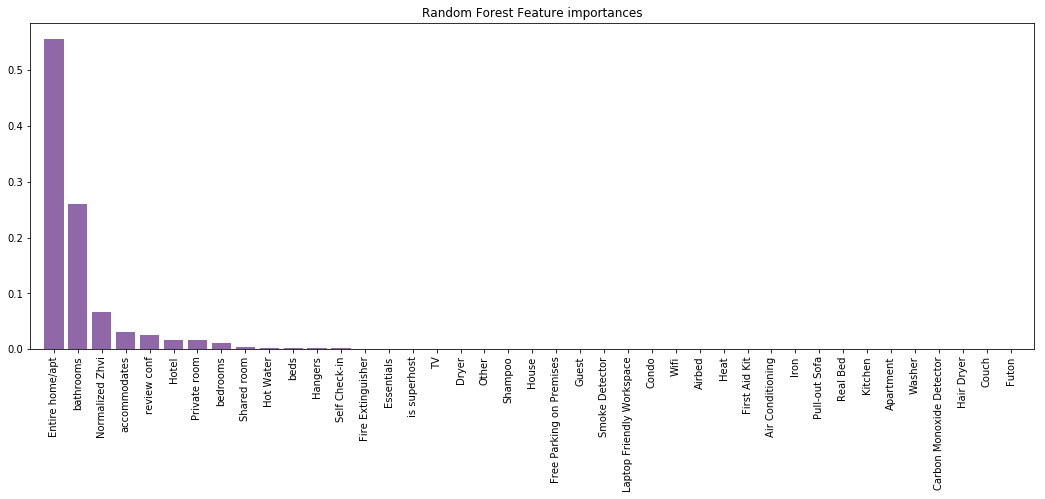

In [32]:
plt.figure(figsize =(18, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), RFR_importances[RFR_indices],
       color="#9067a7", align="center")
plt.xticks(range(X.shape[1]), RFR_indices_name, rotation='vertical')
plt.xlim([-1, X.shape[1]])

In [40]:
print("SVR Feature Ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, list_of_features[f], list_of_coefs[f]))

SVR Feature ranking:
1. Hotel (0.656980)
2. Entire home/apt (0.634022)
3. Normalized Zhvi (0.446712)
4. Air Conditioning (0.234343)
5. bathrooms (0.184261)
6. Pull-out Sofa (0.177380)
7. TV (0.159828)
8. Shampoo (0.117832)
9. bedrooms (0.097227)
10. Washer (0.066828)
11. accommodates (0.064748)
12. Couch (0.048554)
13. Dryer (0.044976)
14. Iron (0.032754)
15. Private room (0.029245)
16. Real Bed (0.008666)
17. Hair Dryer (0.000000)
18. Carbon Monoxide Detector (0.000000)
19. Wifi (-0.002458)
20. beds (-0.007299)
21. Laptop Friendly Workspace (-0.011342)
22. Fire Extinguisher (-0.012348)
23. Other (-0.025613)
24. First Aid Kit (-0.028568)
25. Kitchen (-0.044499)
26. is superhost (-0.049673)
27. Heat (-0.050532)
28. Hot Water (-0.073040)
29. Futon (-0.076240)
30. Self Check-in (-0.100020)
31. Apartment (-0.100555)
32. Free Parking on Premises (-0.115937)
33. Smoke Detector (-0.128212)
34. Condo (-0.129289)
35. House (-0.136204)
36. Airbed (-0.158360)
37. Hangers (-0.160119)
38. Essential

(-1, 41)

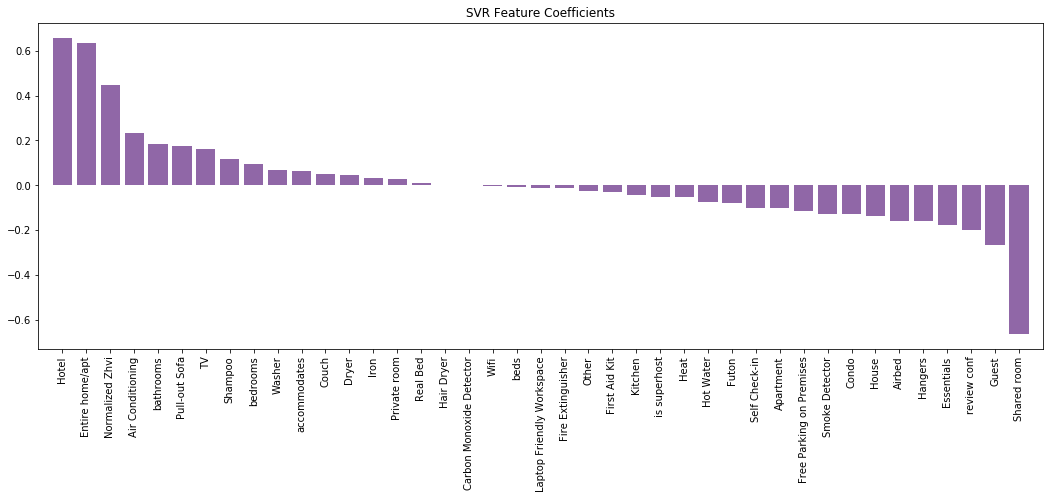

In [42]:
plt.figure(figsize =(18, 6))
plt.title("SVR Feature Coefficients")
plt.bar(range(X.shape[1]), list_of_coefs,
       color="#9067a7", align="center")
plt.xticks(range(X.shape[1]), list_of_features, rotation='vertical')
plt.xlim([-1, X.shape[1]])